<a href="https://colab.research.google.com/github/RyanAlGhifari2211533014/Pembelajaran-Mesin-Ryan-Al-Ghifari-2211533014/blob/main/Pekan_7_ML_Tugas_Clustering_K_Means_Elbow_Methode_Ryan_AL_Ghifari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




In [ ]:
# Membaca dataset "Pekan3.csv" yang sudah diunggah
# Pastikan file 'Pekan3.csv' sudah diunggah terlebih dahulu di Google Colab
df = pd.read_csv('Pekan3.csv')



In [ ]:
# Memilih hanya kolom numerik untuk clustering
df_numeric = df.select_dtypes(include=[np.number])



In [ ]:
# Standarisasi data agar lebih seimbang dalam clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)



In [ ]:
# Menentukan nilai SSE untuk setiap nilai kluster dari 1 sampai 10
sse = []
list_k = list(range(1, 11))

for k in list_k:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=10)  # Set n_init secara eksplisit
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)



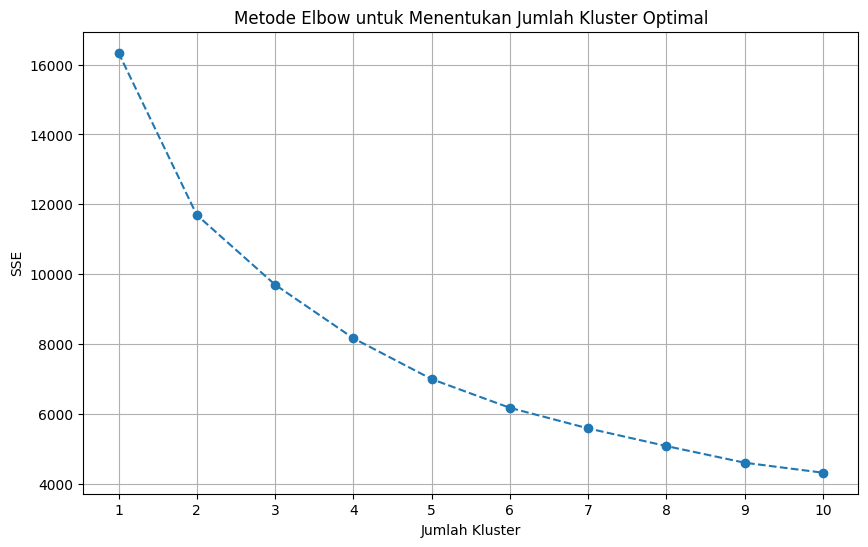

                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1           7599        3799        50         Adidas ORIGINALS     3.3   
2            999         599        40        Adidas CORE / NEO     2.6   
3           6999        3499        50        Adidas CORE / NEO     4.1   
4           7999        3999        50         Adidas ORIGINALS     3.5   

   Reviews  Cluster  
0       41        2  
1       24        0  
2       37        0  
3       35        0  
4       72        0  
Hasil clusteri

In [ ]:
# Plot nilai SSE untuk setiap nilai kluster
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, marker='o', linestyle='--')
plt.xlabel('Jumlah Kluster')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.xticks(list_k)
plt.grid(True)
plt.show()

# Pilih jumlah kluster optimal berdasarkan metode Elbow
# Dalam kasus ini, Anda dapat menentukan berdasarkan plot SSE yang dihasilkan

# Menjalankan KMeans dengan jumlah kluster optimal
best_n_clusters = 3  # Misalnya dari hasil analisis metode Elbow
kmeans = KMeans(n_clusters=best_n_clusters, n_init=10, random_state=10)  # Set n_init secara eksplisit
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Menampilkan hasil clustering
print(df.head())

# Simpan hasil clustering ke file CSV
df.to_csv('Pekan3_clustered.csv', index=False)
print("Hasil clustering telah disimpan ke 'Pekan3_clustered.csv'")